# Figure supp 1

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [2]:
previous, current = os.path.split(os.getcwd())
dname = previous[0:-5]

# Left pannels  (words)

In [3]:
words_natural = pd.read_csv( dname + '\\data\\LMM\\natural_distrib_monosyllabic_words_pk_env_lexique.csv')
words_natural['syllabic_info'] = words_natural['syllabic_info'].values/100.
words_natural['phonemic_info'] = words_natural['phonemic_info'].values/100.

In [4]:
words_selected = pd.read_csv(dname + '\\data\\LMM\\selected_distribution_monosyllabic_words_pk_env.csv')
words_selected['syllabic_info'] = words_selected['syllabic_info'].values/100.
words_selected['phonemic_info'] = words_selected['phonemic_info'].values/100.

In [5]:
words_data =[words_natural,words_selected]
words_variables = ['peak_env','phonemic_rate', 'syllabic_rate', 'phonemic_info', 'syllabic_info', 'static_surp']

## Pannel A

In [6]:
lims = [[0,10],[0,20],[0,7],[0,5],[0,2],[0,30]]

largeur = 0.5

teinte = 1

legend_elements = [  
                Patch(facecolor='grey',alpha= 0.35 ,edgecolor='grey',label='natural'),
                Patch(facecolor='grey',edgecolor='darkgrey',label='selected')]     

alphas = np.tile([0.7,0.35],7)
colors = ['darkgray','#e41a1c', '#ff7f00','#efca08',  '#4daf4a', '#377eb8', 'darkorchid']
xlabels = [
    '$s^{-1}$',
    '$s^{-1}$',
    '$s^{-1}$', 
    '$bit.s^{-1}$', 
    '$bit.s^{-1}$',
    '$bit.s^{-1}$' ]

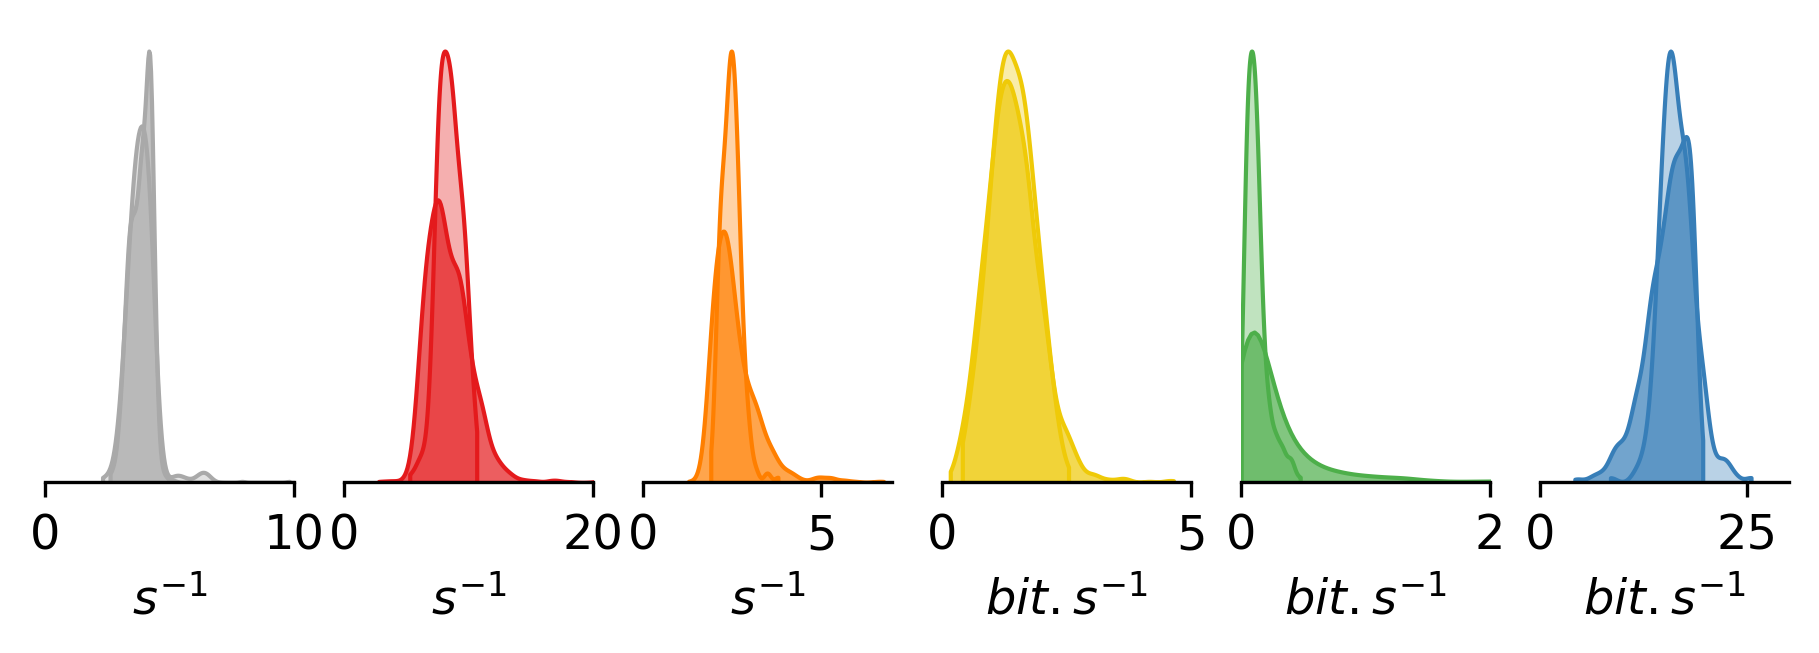

In [12]:
figA,axs = plt.subplots(1,6,figsize=(7.5,2.), facecolor='w', dpi=300)
plt.rcParams["font.size"] = "11.5"
b=-1
for i,(num,var,ax) in enumerate(zip(range(len(words_variables)),words_variables,axs.ravel())):
    a =-1
    for word in words_data:
        b+=1
        a+=1
        sns.kdeplot(word[var].values, fill=True, ax=ax,
                     color=np.repeat(colors,2)[b], cut = 0, log_scale = False, label ='general',alpha=alphas[a]) 
        ax.spines["right"].set_visible(False)
        ax.spines["top"].set_visible(False)

        ax.spines["left"].set_visible(False)
        ax.set_ylabel('')
        ax.set_yticks([])
        ax.set_xlim(lims[num]);
        ax.set_xlabel(xlabels[i]);


In [13]:
#figA.savefig(dname + "\\Figures\\fig_Supp_1_in_progress/SUP1a.png", dpi=300, bbox_inches='tight')

## Pannel B

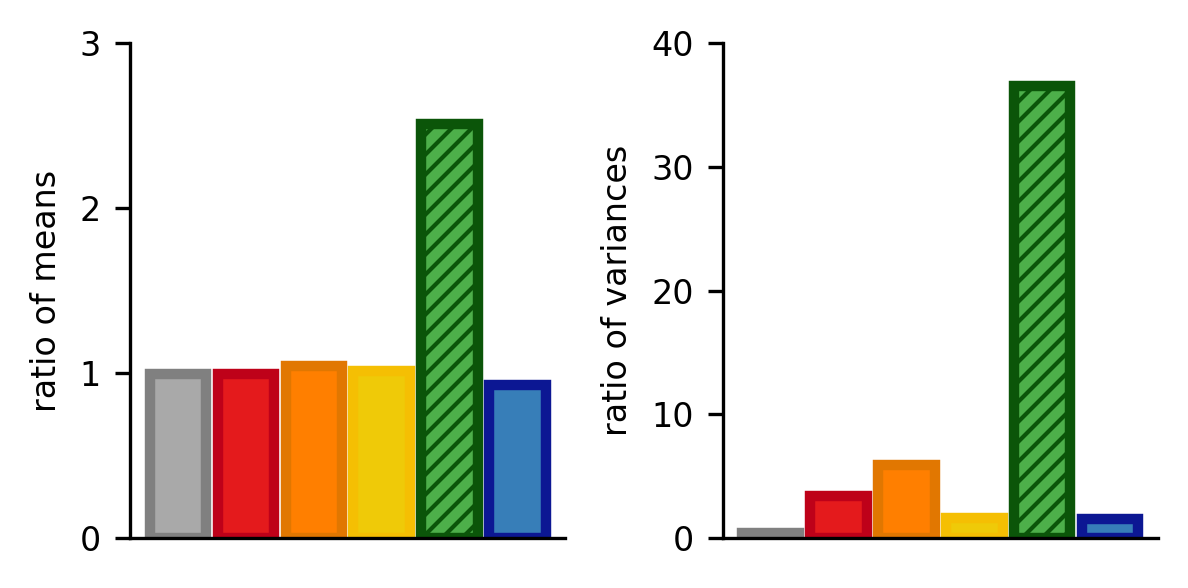

In [15]:
barcol = ['darkgrey','#e41a1c', '#ff7f00','#efca08',  '#4daf4a', '#377eb8', 'darkorchid']
edgos = ['grey','#be0119','#e17701','#f5bf03','#0b5509','#0c1793', '#2000b1']
largeur = 0.125
teinte = 1
spaces = [0,0.15,0.3,0.45,0.6, 0.75]

figB,axs = plt.subplots(1,2,figsize=(4,2), facecolor='w', dpi=300)
plt.rcParams["font.size"] = "8"

mean_data = words_natural[words_variables].mean().values/words_selected[words_variables].mean().values
bars = axs[0].bar(spaces,mean_data,alpha= teinte, color = barcol, width = largeur, edgecolor= edgos, linewidth = 2.5);
bars[4].set_hatch('/////')

for j in ['right','top']:
    axs[0].spines[j].set_visible(False)
axs[0].set_xticks([]);
axs[0].set_ylabel("ratio of means");
axs[0].set_yticks([0,1,2,3]);
axs[0].set_ylim([0, 3]);


median_data = words_natural[words_variables].var().values/words_selected[words_variables].var().values
bars =axs[1].bar(spaces,median_data,alpha= teinte, color = barcol, width = largeur, edgecolor= edgos, linewidth = 2.5) #ax4.bar([0,1,2,3,4,5],np.concatenate((median_data,[0.]))
for j in ['right','top']:
    axs[1].spines[j].set_visible(False)
bars[4].set_hatch('/////')

axs[1].set_xticks([]);
axs[1].set_ylabel("ratio of variances");
axs[1].set_yticks([0,10,20,30,40]);
axs[1].set_ylim([0, 40]);

plt.tight_layout()

In [16]:
#figB.savefig(dname + "\\Figures\\fig_Supp_1_in_progress\\SUP1b.png", dpi=300, bbox_inches='tight')

## Pannel C left

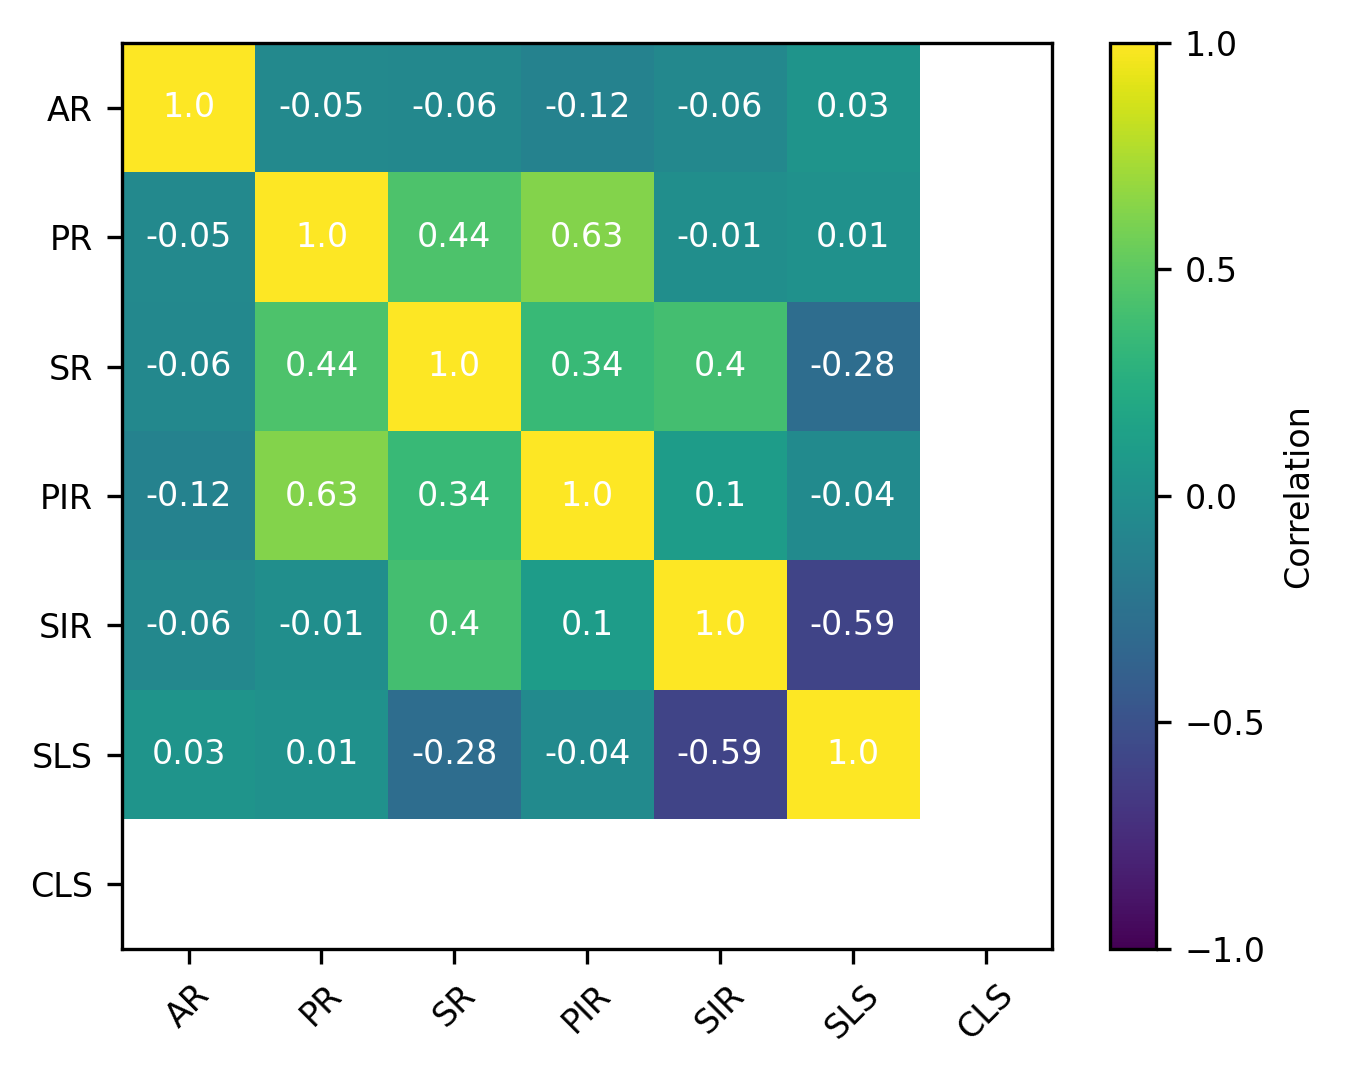

In [17]:
figC,ax = plt.subplots(1,1,figsize=(5.,4.), facecolor='w', dpi=300)

variable_names = [
    'AR', 
    'PR',
    'SR',
    'PIR',
    'SIR', 
    'SLS',
    'CLS' ]
corr12 = words_natural[words_variables].corr().values
corr12 = np.asarray([np.concatenate((i,[np.nan])) for i in corr12])
corr12 = np.concatenate(( corr12, np.full((1,7), np.nan)))
im = ax.imshow(corr12, vmin=-1, vmax=1, aspect='auto')
# Loop over data dimensions and create text annotations.
for i in range(corr12.shape[0]):
    for j in range(corr12.shape[1]):
        text = ax.text(j, i, np.round(corr12[i, j],2),
                       ha="center", va="center", color="w")
ax.set_xticks(range(7))
ax.set_xticklabels(variable_names, rotation=45)
ax.set_yticks(range(7))
ax.set_yticklabels(variable_names)
cbar = plt.colorbar(im, ax=ax, ticks=np.linspace(-1,1,5))
cbar.ax.set_ylabel('Correlation');

In [18]:
#figC.savefig(dname + "\\Figures\\fig_Supp_1_in_progress\\SUP1c.png", dpi=300, bbox_inches='tight')

## Pannel C right

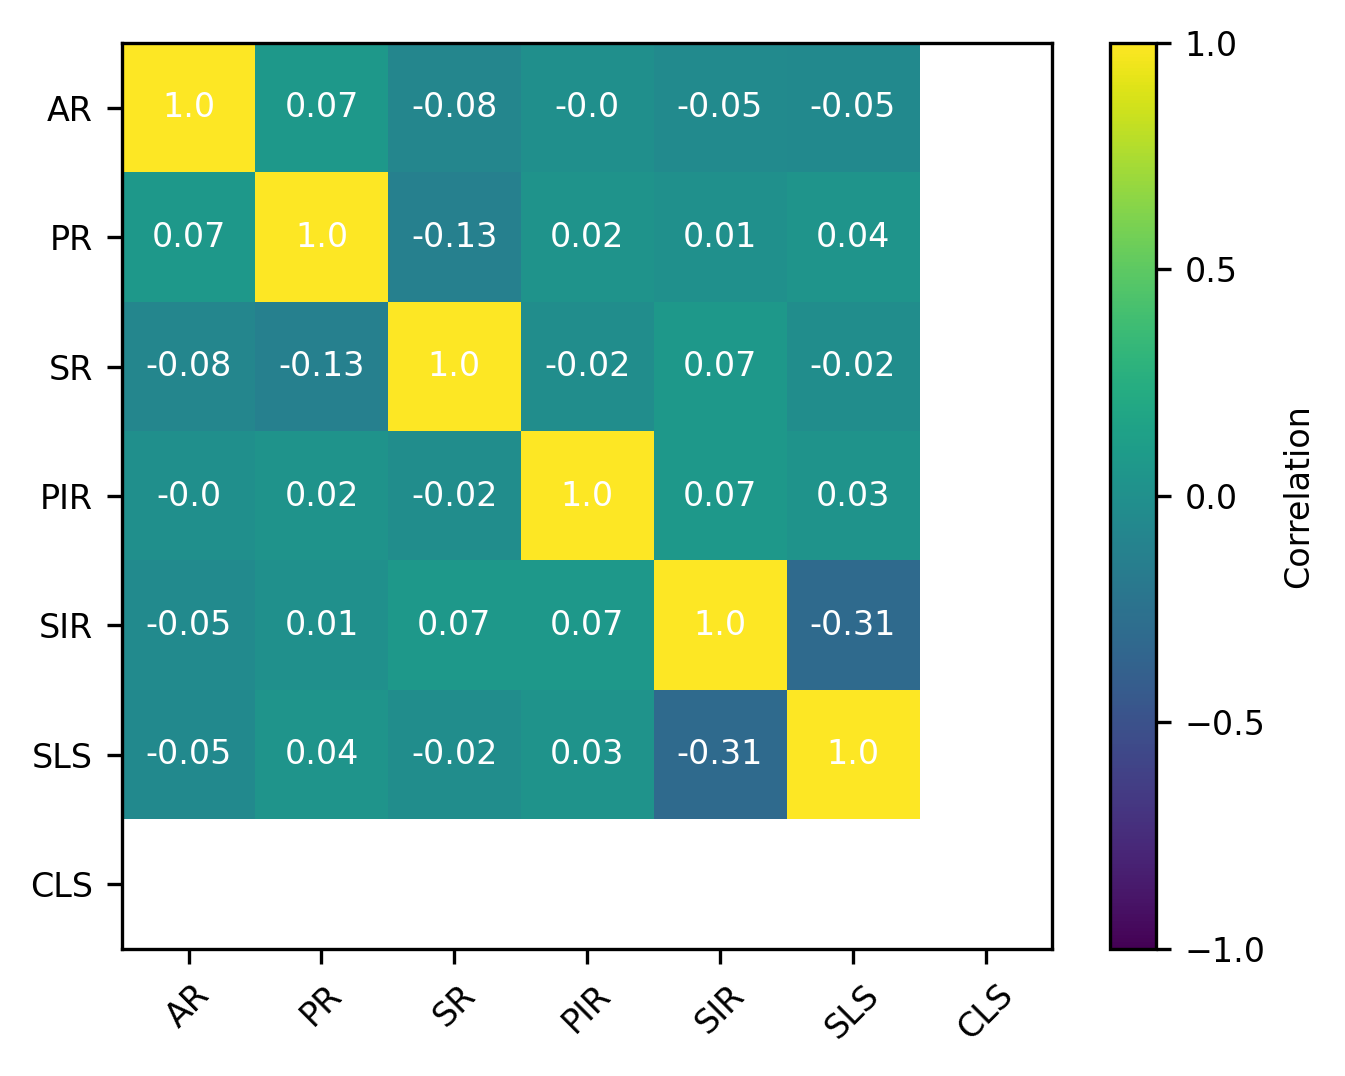

In [19]:
figC2,ax = plt.subplots(1,1,figsize=(5.,4.), facecolor='w', dpi=300)

variable_names = [
    'AR',
    'PR',
    'SR',
    'PIR', 
    'SIR',
    'SLS',
    'CLS' ]

corr1 = words_selected[words_variables].corr().values
corr1 = np.asarray([np.concatenate((i,[np.nan])) for i in corr1])
corr1 = np.concatenate((corr1, np.full((1,7), np.nan) ))
im = ax.imshow(corr1, vmin=-1, vmax=1, aspect='auto')
# Loop over data dimensions and create text annotations.
for i in range(corr1.shape[0]):
    for j in range(corr1.shape[1]):
        text = ax.text(j, i, np.round(corr1[i, j],2),
                       ha="center", va="center", color="w")
ax.set_xticks(range(7))
ax.set_xticklabels(variable_names, rotation=45)
ax.set_yticks(range(7))
ax.set_yticklabels(variable_names)

cbar = plt.colorbar(im, ax=ax, ticks=np.linspace(-1,1,5))
cbar.ax.set_ylabel('Correlation');

In [1]:
#figC2.savefig(dname + "\\Figures\\fig_Supp_1_in_progress\\SUP1c2.png", dpi=300, bbox_inches='tight')

NameError: name 'figC2' is not defined

# Right pannels  (sentences)

In [21]:
sent_natural = pd.read_csv(dname + '/data/LMM/natural_distribution_sentences_pk_env.csv')
sent_natural['phonemic_info'] = sent_natural['phonemic_info'].values/100.
sent_natural['syllabic_info'] = sent_natural['syllabic_info'].values/100.
sub = pd.read_csv(dname + '/data/GLMM/all_subjects_sentences_peak_env.csv')
sent_selected = sub.loc[(sub['suj_id']=='suj_1') & (sub['vitesse']== 2.0)].copy()
sent_selected = sent_selected[['phon_fl/s', 'syll_fl/s', 'nb_phon/s','nb_syll/s', 'log_freqlex/s','camemBERT/s','peak_env']]
sent_selected['phon_fl/s'] = sent_selected['phon_fl/s'].values/100.
sent_selected['syll_fl/s'] = sent_selected['syll_fl/s'].values/100.
sent_selected.columns = sent_natural.columns


In [22]:
for i in sent_selected.columns:
    sent_selected[i] =  sent_selected[i].values/2.

## Pannel D

In [23]:
dfs = [words_natural,words_selected,sent_natural,sent_selected]
variables = ['peak_env', 'phonemic_rate', 'syllabic_rate', 'phonemic_info', 'syllabic_info', 'static_surp','context_surp']

colors = ['darkgrey', '#e41a1c', '#ff7f00','#efca08',  '#4daf4a', '#377eb8', 'darkorchid']
barcol = ['grey', '#e41a1c', '#ff7f00','#efca08',  '#4daf4a', '#377eb8', 'darkorchid']
edgos = ['grey', '#be0119','#e17701','#f5bf03','#0b5509','#0c1793', '#2000b1']
ticks = [
np.linspace(5,35, num=5, dtype=np.int32),    
np.linspace(10,80, num=5, dtype=np.int32),
np.linspace(5,35, num=5, dtype=np.int32),
np.linspace(50,1200, num=5, dtype=np.int32),
np.linspace(100,2250, num=5, dtype=np.int32),
np.linspace(5,55, num=5, dtype=np.int32),
np.linspace(1,25, num=5, dtype=np.int32)]

xlabels = [
    'Rate ($s^{-1}$)',
    'Rate ($s^{-1}$)',
    'Rate ($s^{-1}$)', 
    'Suprise rate ($bit.s^{-1}$)', 
    'Suprise rate ($bit.s^{-1}$)',
    'Suprise rate ($bit.s^{-1}$)',
    'Suprise rate ($bit.s^{-1}$)' ]

lims = [[5,45], [7,61],[3.5,27],[50,900],[50,2000],[5,45],[-0.5,20]]

titles =[   r'Acoustic rate',
            r'Phonemic rate',
            r'Syllabic rate',     
            r'Phonemic information',
            r'Syllabic information',
            r'Static lexical surprise',
            r'Contextual lexical surprise']

sentences_data =[sent_natural, sent_selected]
sentences_variables = ['peak_env','phonemic_rate', 'syllabic_rate', 'phonemic_info', 'syllabic_info', 'static_surp','context_surp']

xlabels = [
    '$s^{-1}$',
    '$s^{-1}$',
    '$s^{-1}$', 
    '$bit.s^{-1}$', 
    '$bit.s^{-1}$',
    '$bit.s^{-1}$',
    '$bit.s^{-1}$' ]

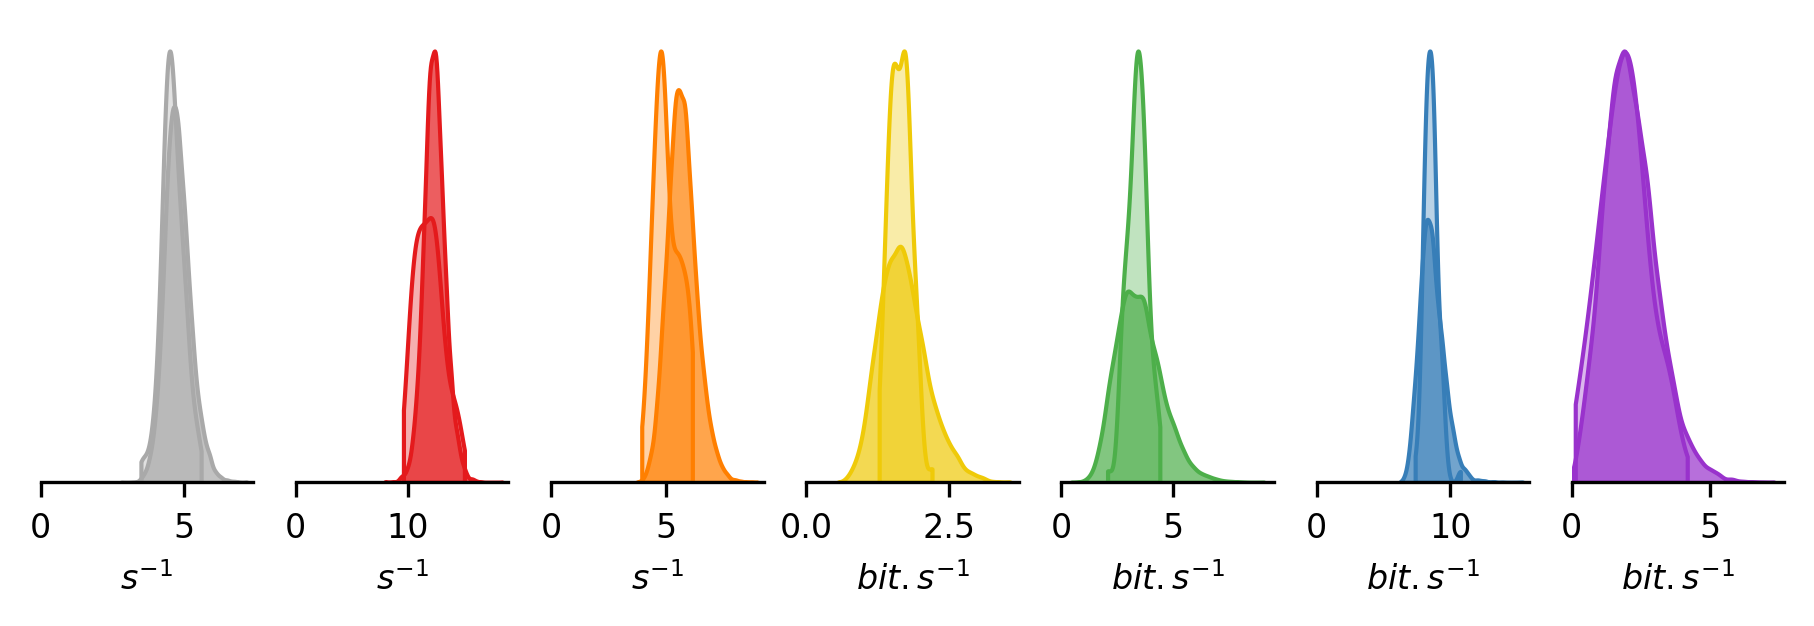

In [24]:
figD,axs = plt.subplots(1,7,figsize=(7.5,2), facecolor='w', dpi=300)
plt.rcParams["font.size"] = "11.5"

b=-1
for i,(var,ax) in enumerate(zip(sentences_variables,axs.ravel())):
    a =-1
    for sent in sentences_data:
        b+=1
        a+=1
        sns.kdeplot(sent[var].values, fill=True, ax=ax,
                     color=np.repeat(colors,2)[b], cut = 0, log_scale = False, label ='general',alpha=alphas[a]) 
        ax.spines["right"].set_visible(False)
        ax.spines["top"].set_visible(False)
        ax.spines["left"].set_visible(False)
        ax.set_ylabel('')
        ax.set_yticks([])
        ax.set_xlim(0);
        ax.set_xlabel(xlabels[i]);


In [25]:
#figD.savefig(dname + "\\Figures\\fig_Supp_1_in_progress\\SUP1d.png", dpi=300, bbox_inches='tight')

## Pannel E

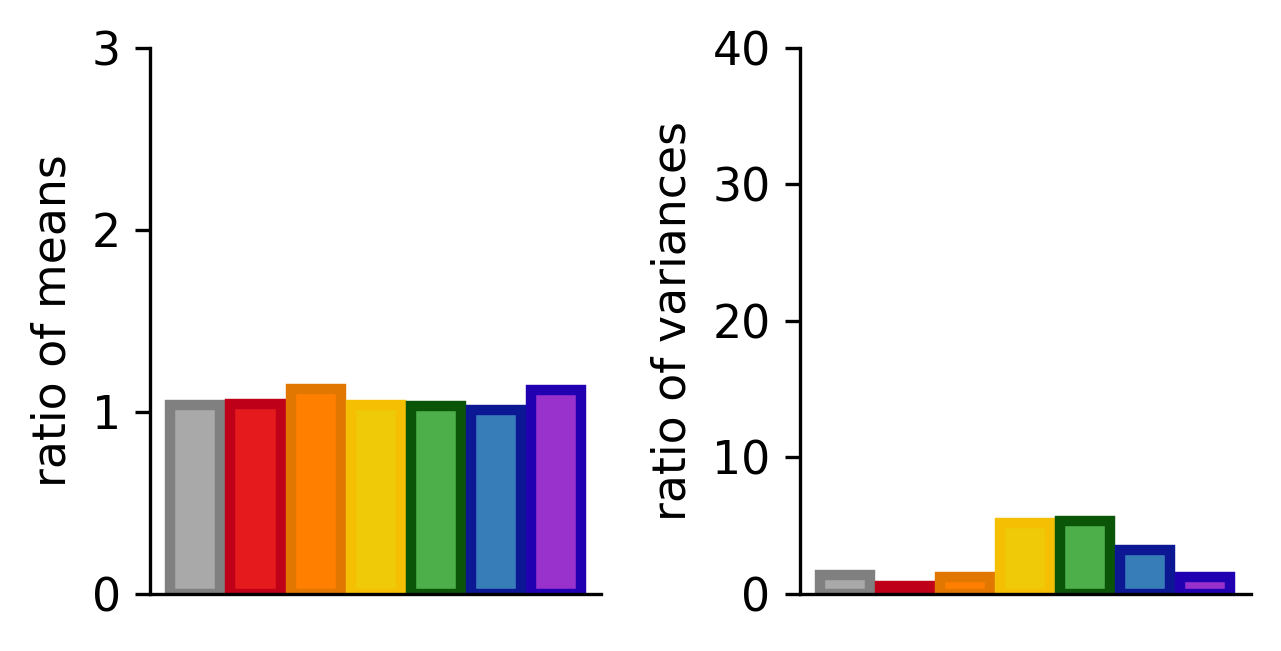

In [27]:
largeur = 0.125
teinte = 1
spaces = [0,0.15,0.3,0.45,0.6,0.75,0.9]

figE,axs = plt.subplots(1,2,figsize=(4.4,2.3), facecolor='w', dpi=300)
plt.rcParams["font.size"] = "11"

mean_data2 = sent_natural[sentences_variables].mean().values/sent_selected[sentences_variables].mean().values
axs[0].bar(spaces,mean_data2,alpha= teinte, color = colors, width = largeur, edgecolor= edgos, linewidth = 2.5)
for j in ['right','top']:
    axs[0].spines[j].set_visible(False)
axs[0].set_xticks([]);
axs[0].set_ylabel("ratio of means");
axs[0].set_yticks([0,1,2,3]);
axs[0].set_ylim([0, 3]);


median_data2 = sent_natural[sentences_variables].var().values/sent_selected[sentences_variables].var().values
axs[1].bar(spaces,median_data2,alpha= teinte, color = colors,width = largeur, edgecolor= edgos, linewidth = 2.5)
for j in ['right','top']:
    axs[1].spines[j].set_visible(False)
axs[1].set_xticks([]);
axs[1].set_ylabel("ratio of variances");
axs[1].set_yticks([0,10,20,30,40]);
axs[1].set_ylim([0, 40]);

plt.tight_layout()

In [28]:
#figE.savefig(dname + "\\Figures\\fig_Supp_1_in_progress\\SUP1e.png", dpi=300, bbox_inches='tight')

## Pannel F left

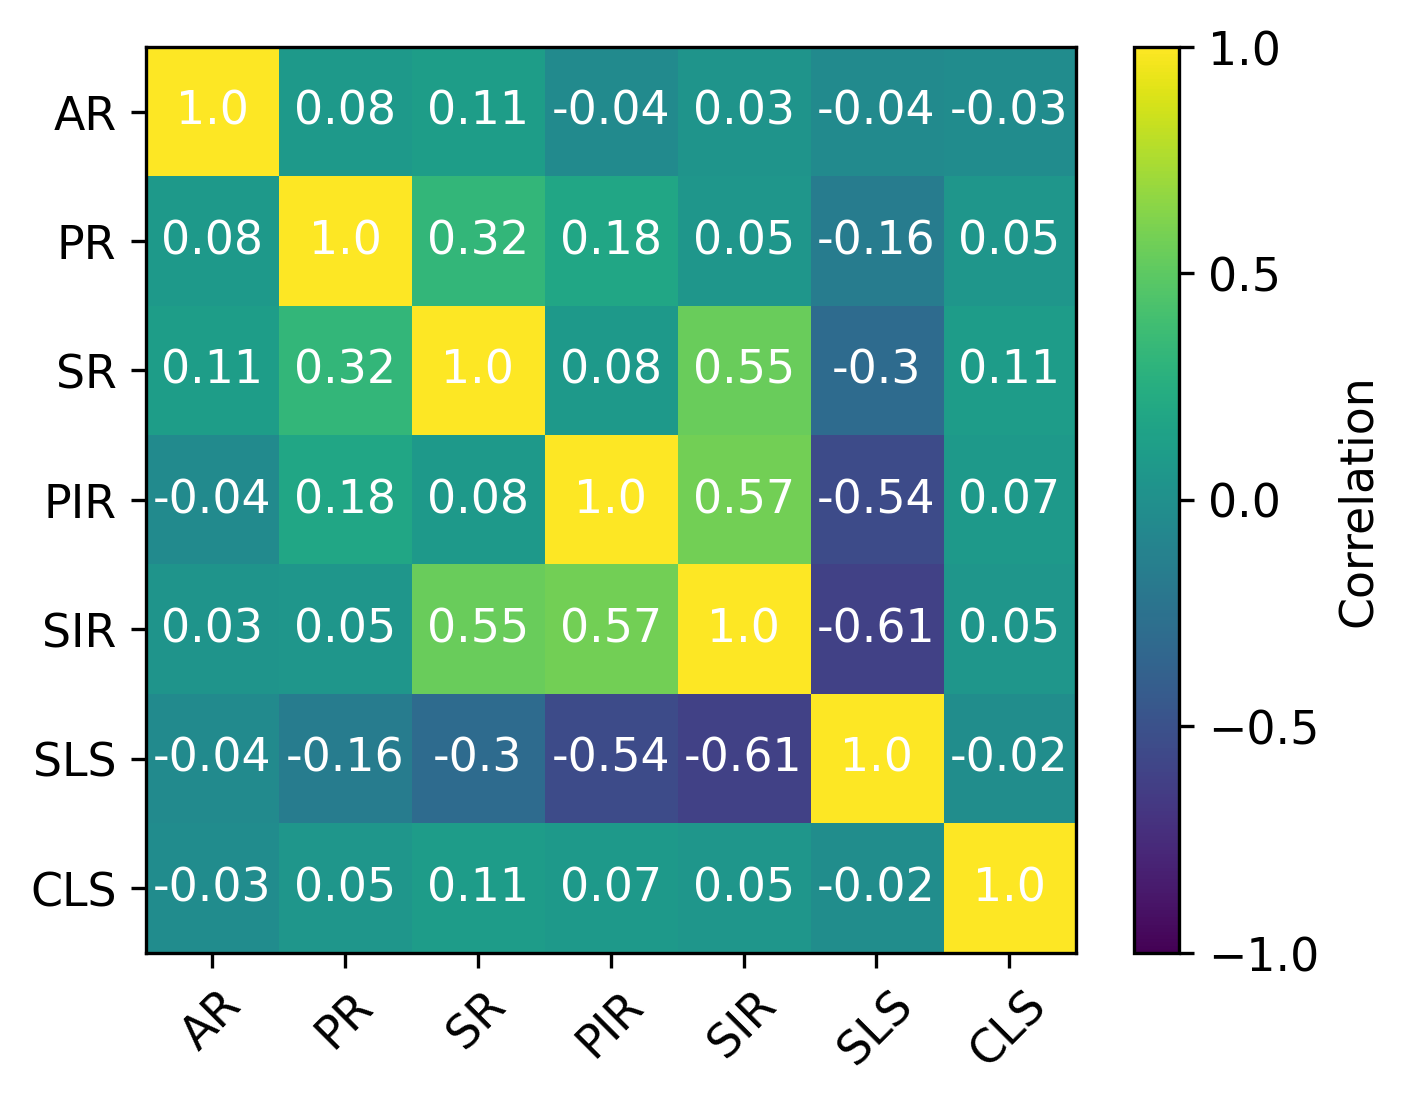

In [29]:
#correlations distribution variables sentences
figF,ax = plt.subplots(1,1,figsize=(5.,4.), facecolor='w', dpi=300)
variable_names = [
    'AR', 
    'PR',
    'SR',
    'PIR', 
    'SIR',
    'SLS',
    'CLS' ]
corr3 = sent_natural[sentences_variables].corr().values
im = ax.imshow(corr3, vmin=-1, vmax=1, aspect='auto')
# Loop over data dimensions and create text annotations.
for i in range(corr3.shape[0]):
    for j in range(corr3.shape[1]):
        text = ax.text(j, i, np.round(corr3[i, j],2),
                       ha="center", va="center", color="w")

ax.set_xticks(range(7))
ax.set_xticklabels(variable_names, rotation=45)
ax.set_yticks(range(7))
ax.set_yticklabels(variable_names)

cbar = plt.colorbar(im, ax=ax, ticks=np.linspace(-1,1,5))
cbar.ax.set_ylabel('Correlation');

In [30]:
#figF.savefig(dname + "\\Figures\\fig_Supp_1_in_progress\\SUP1f.png", dpi=300, bbox_inches='tight')

## Pannel F right

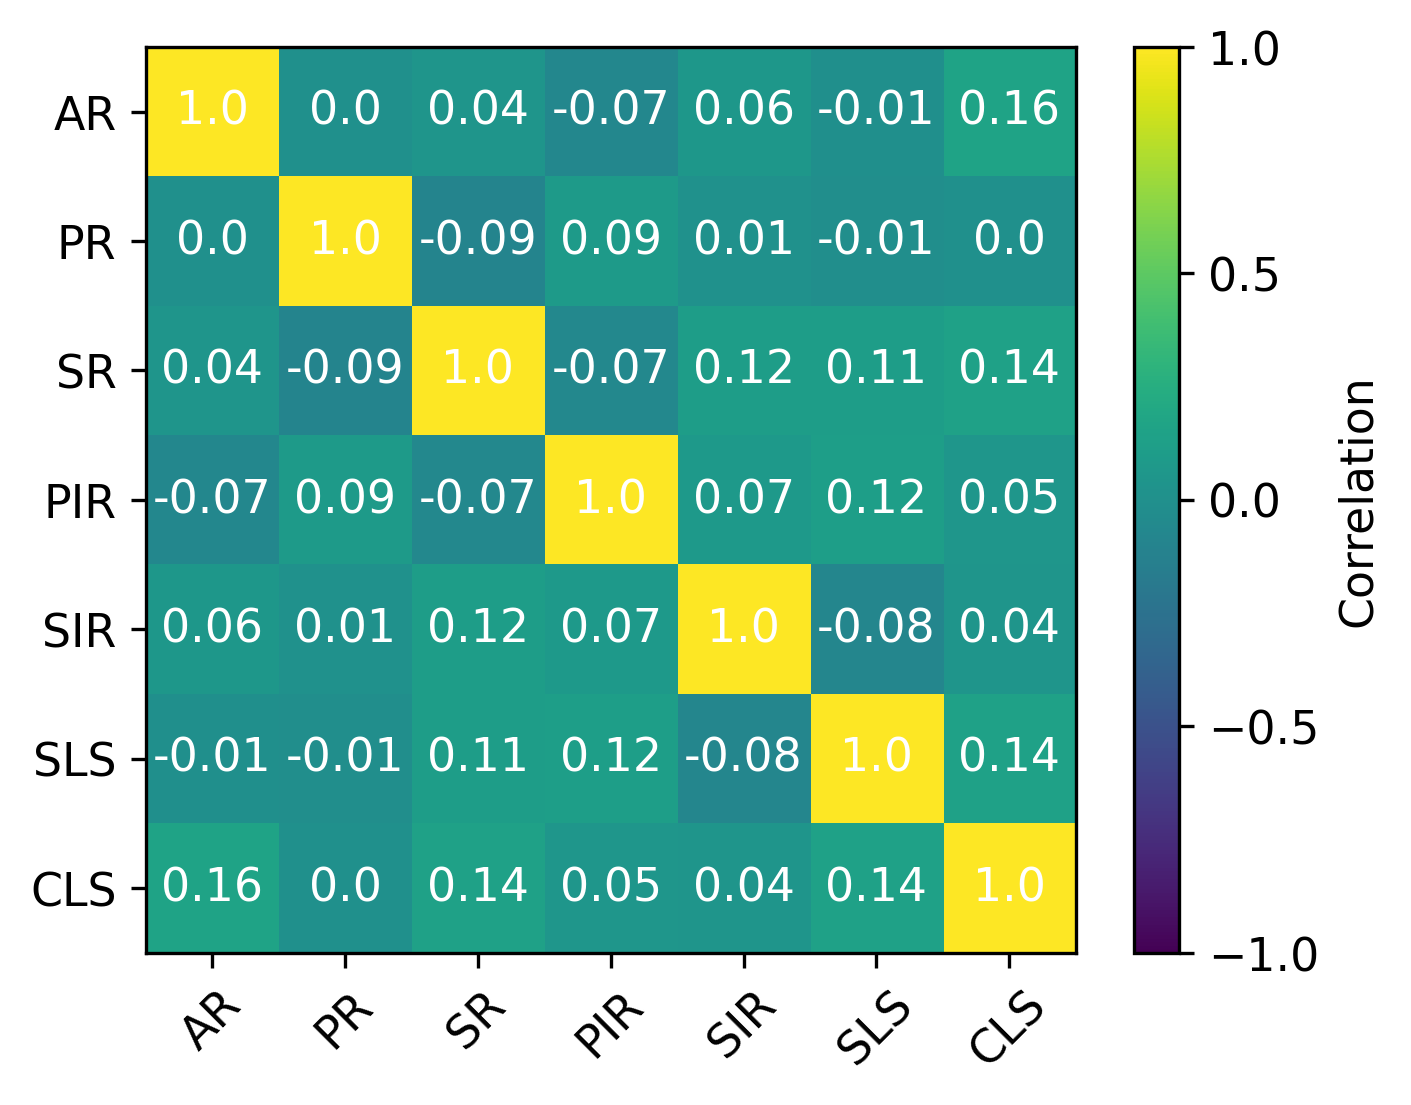

In [31]:
figF2,ax = plt.subplots(1,1,figsize=(5.,4.), facecolor='w', dpi=300)
variable_names = [
    'AR',
    'PR',
    'SR',
    'PIR',
    'SIR', 
    'SLS',
    'CLS' ]
corr2 = sent_selected[sentences_variables].corr().values
im = ax.imshow(corr2, vmin=-1, vmax=1, aspect='auto')
# Loop over data dimensions and create text annotations.
for i in range(corr2.shape[0]):
    for j in range(corr2.shape[1]):
        text = ax.text(j, i, np.round(corr2[i, j],2),
                       ha="center", va="center", color="w")

ax.set_xticks(range(7))
ax.set_xticklabels(variable_names, rotation=45)
ax.set_yticks(range(7))
ax.set_yticklabels(variable_names)

cbar = plt.colorbar(im, ax=ax, ticks=np.linspace(-1,1,5))
cbar.ax.set_ylabel('Correlation');

In [34]:
#figF.savefig(dname + "\\Figures\\fig_Supp_1_in_progress\\SUP1f2.png", dpi=300, bbox_inches='tight')